In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

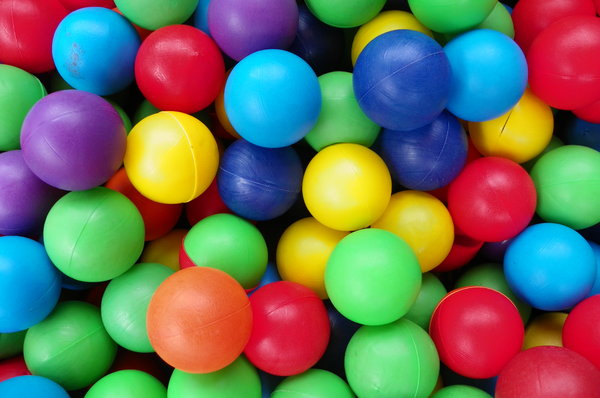

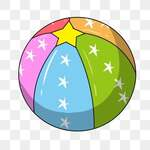

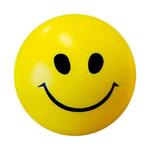

In [42]:
img=cv2.imread("/content/colorball.jpg")
add_img1=cv2.imread("/content/add_b_150.jpg")
add_img2=cv2.imread("/content/smile_ball.jpg")
cv2_imshow(img);
cv2_imshow(add_img1)
cv2_imshow(add_img2)

In [43]:
# Lấy ra các thông số kích thước hình dạng của các ảnh thêm vào
rows1,cols1,channels1=add_img1.shape
rows2,cols2,channels2=add_img2.shape
# Xác định vị trí cần chèn các ảnh
roi1=img[50:(50+rows1),50:(50+cols1)]
roi2=img[150:(150+rows2),300:(300+cols2)]

In [44]:
# convert add_img sang GRAY 
add_Gray1 = cv2.cvtColor(add_img1,cv2.COLOR_BGR2GRAY)
add_Gray2 = cv2.cvtColor(add_img2,cv2.COLOR_BGR2GRAY)
# threshold: THRESH_BINARY
ret1,mask1 = cv2.threshold(add_Gray1,220,255,cv2.THRESH_BINARY)
ret2,mask2 = cv2.threshold(add_Gray2,220,255,cv2.THRESH_BINARY)
# trích xuất các phần cần thiết
inverseMask1 = cv2.bitwise_not(mask1)
background1 = cv2.bitwise_and(roi1,roi1,mask=mask1)
frontImage1 = cv2.bitwise_and(add_img1,add_img1,mask=inverseMask1)
inverseMask2 = cv2.bitwise_not(mask2)
background2 = cv2.bitwise_and(roi2,roi2,mask=mask2)
frontImage2 = cv2.bitwise_and(add_img2,add_img2,mask=inverseMask2)
# thêm các phần đã trích suất vào ảnh ban đầu đúng vị trí mong muốn
dest1=cv2.add(background1,frontImage1)
dest2=cv2.add(background2,frontImage2)
img[50:(50+rows1),50:(50+cols1)]=dest1
img[150:(150+rows2),300:(300+cols2)]=dest2

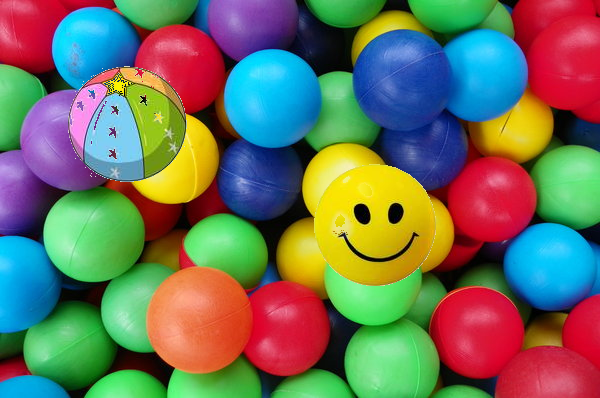

In [45]:
# hiển thị kết quả
cv2_imshow(img)